## Observations and Insights 

In [261]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress,pearsonr

# Study data files
mouse_metadata_path = "Resources/Mouse_metadata.csv"
study_results_path = "Resources/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_data_df = pd.merge( mouse_metadata, study_results, on = "Mouse ID")

# Display the data table for preview
mouse_data_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [262]:
# Check new df for any null data and for column info
mouse_data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1893 entries, 0 to 1892
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Mouse ID            1893 non-null   object 
 1   Drug Regimen        1893 non-null   object 
 2   Sex                 1893 non-null   object 
 3   Age_months          1893 non-null   int64  
 4   Weight (g)          1893 non-null   int64  
 5   Timepoint           1893 non-null   int64  
 6   Tumor Volume (mm3)  1893 non-null   float64
 7   Metastatic Sites    1893 non-null   int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 133.1+ KB


In [263]:
# Checking the number of mice.
mouse_data_df["Mouse ID"].nunique()

249

In [264]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mouse = mouse_data_df[mouse_data_df.duplicated(['Mouse ID', 'Timepoint'])]
duplicate_mouse

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [265]:
# getting rid of duplicates 
#mouse_data_clean_df = mouse_data_df[mouse_data_df['Mouse ID'] != 'g989']
mouse_data_clean_df = mouse_data_df.drop(mouse_data_df.index [[909, 911, 913, 915, 917]])

In [266]:
mouse_data_clean_df.shape

(1888, 8)

In [267]:
# run duplicate function to check for anymore duplicates from new data
mouse_data_clean_df[mouse_data_clean_df.duplicated(["Mouse ID", "Timepoint"])]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites


In [268]:
# Checking the number of mice in the clean DataFrame.
mouse_data_clean_df['Mouse ID'].nunique()

249

In [269]:
# final df for clean data
mouse_data_clean_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


## Summary Statistics

In [270]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
summary_drug_reg = mouse_data_clean_df.groupby(["Drug Regimen"]).agg(['mean', 'median', 'std', 'sem']).reset_index()


In [271]:
# Clean new df
summary_drug_reg = summary_drug_reg.loc[:, ['Drug Regimen', 'Tumor Volume (mm3)']]

In [272]:
summary_drug_reg.reset_index(drop = True)
summary_drug_reg

Drug Regimen Tumor Volume (mm3)                               
                             mean     median       std       sem
0    Capomulin          40.675741  41.557809  4.994774  0.329346
1     Ceftamin          52.591172  51.776157  6.268188  0.469821
2    Infubinol          52.884795  51.820584  6.567243  0.492236
3     Ketapril          55.235638  53.698743  8.279709  0.603860
4     Naftisol          54.331565  52.509285  8.134708  0.596466
5      Placebo          54.033581  52.288934  7.821003  0.581331
6     Propriva          52.393463  50.909965  6.568014  0.525862
7     Ramicane          40.216745  40.673236  4.846308  0.320955
8     Stelasyn          54.233149  52.431737  7.710419  0.573111
9    Zoniferol          53.236507  51.818479  6.966589  0.516398

## Bar and Pie Charts

In [273]:
# Create a new df for drug regimen and number of times used throughout the study
drug_reg_count = mouse_data_clean_df.groupby(["Drug Regimen"]).agg(['count']).reset_index()
drug_reg_count = drug_reg_count.loc[:, ["Drug Regimen", "Mouse ID"]]


In [274]:
drug_reg_count = drug_reg_count.rename(columns = {"Mouse ID": "Used_Throughout"})
drug_reg_count.columns = drug_reg_count.columns.droplevel(1)
drug_reg_count.head()

,Drug Regimen,Used_Throughout
0,Capomulin,230
1,Ceftamin,178
2,Infubinol,178
3,Ketapril,188
4,Naftisol,186


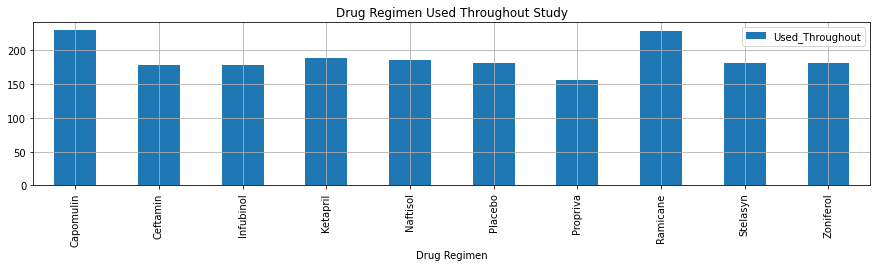

In [275]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
drug_reg_count.plot(kind="bar", x="Drug Regimen", y="Used_Throughout", figsize=(15, 3), grid = True, title="Drug Regimen Used Throughout Study")

plt.show()

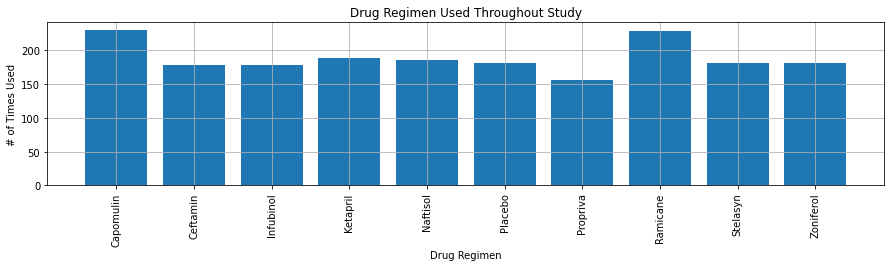

In [276]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
plt.figure(figsize = (15, 3))
plt.bar(drug_reg_count['Drug Regimen'], drug_reg_count['Used_Throughout'])
plt.xticks(rotation = 90)
plt.title("Drug Regimen Used Throughout Study")
plt.xlabel("Drug Regimen")
plt.ylabel("# of Times Used")
plt.grid()
plt.show()


In [277]:
# Generate a df to use in the creation of pie graphs
male_female_df = mouse_data_clean_df.groupby(["Sex"]).agg(['count']).reset_index()
male_female_df = male_female_df.loc[:, ["Sex", "Mouse ID"]]

In [278]:
# Renaming columns and dropping the level index name
male_female_df = male_female_df.rename(columns = {"Mouse ID": "Count"})
male_female_df.columns = male_female_df.columns.droplevel(1)
male_female_df.head()

,Sex,Count
0,Female,930
1,Male,958


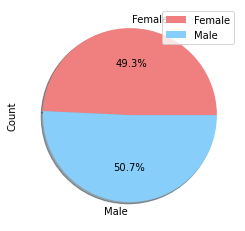

In [279]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
male_female_df.plot(kind = "pie", y="Count", autopct='%1.1f%%', shadow = True, colors = ["lightcoral", "lightskyblue"], labels=["Female", "Male"])
plt.show()

In [280]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ["Female Mice", "Male Mice"]
colors = ["lightcoral", "lightskyblue"]



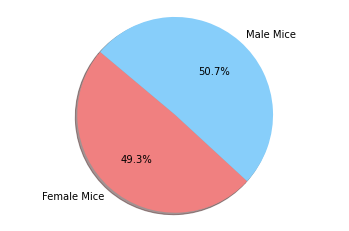

In [281]:
# create pie chart with the above variables
plt.pie(male_female_df['Count'], labels= labels, colors = colors, autopct="%1.1f%%", shadow=True, startangle=140)
plt.axis("equal")
plt.show()


## Quartiles, Outliers and Boxplots

In [282]:
# OG Data
mouse_data_clean_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [283]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_time_stamp_df = mouse_data_clean_df.sort_values( by = ['Timepoint'], ascending = False).reset_index()

last_time_stamp_df.head(40)


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
# summary_drug_reg = mouse_data_clean_df.groupby(["Drug Regimen"]).agg(['mean', 'median', 'std', 'sem']).reset_index()

,index,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,1892,z969,Naftisol,Male,9,30,45,73.867845,4
1,834,f345,Infubinol,Male,23,26,45,60.918767,1
2,962,i635,Propriva,Male,21,26,45,58.633404,3
3,134,r554,Capomulin,Female,8,17,45,32.377357,3
4,930,h246,Ketapril,Male,13,30,45,74.104086,2
5,903,g570,Propriva,Male,16,29,45,70.492788,2
6,884,g497,Ketapril,Male,19,28,45,69.872251,2
7,874,g296,Zoniferol,Female,14,29,45,68.163195,4
8,144,m957,Capomulin,Female,3,19,45,33.329098,1
9,850,f545,Zoniferol,Female,20,26,45,73.324432,1


In [ ]:
mouse_data_df[mouse_data_df.duplicated(['Mouse ID', 'Timepoint'])]

In [ ]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [284]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capomulin_mouse_df = mouse_data_clean_df.loc[mouse_data_clean_df['Drug Regimen']=='Capomulin', :].reset_index(drop= True)
capomulin_mouse_df.head(10)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,s185,Capomulin,Female,3,17,0,45.000000,0
1,s185,Capomulin,Female,3,17,5,43.878496,0
2,s185,Capomulin,Female,3,17,10,37.614948,0
3,s185,Capomulin,Female,3,17,15,38.177232,0
4,s185,Capomulin,Female,3,17,20,36.866876,0
5,s185,Capomulin,Female,3,17,25,33.949940,0
6,s185,Capomulin,Female,3,17,30,32.959671,1
7,s185,Capomulin,Female,3,17,35,28.328531,1
8,s185,Capomulin,Female,3,17,40,25.472143,1
9,s185,Capomulin,Female,3,17,45,23.343598,1


In [285]:
mouse_s185_df = capomulin_mouse_df.loc[capomulin_mouse_df['Mouse ID']=='s185', :]
mouse_s185_df.head(10)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,s185,Capomulin,Female,3,17,0,45.000000,0
1,s185,Capomulin,Female,3,17,5,43.878496,0
2,s185,Capomulin,Female,3,17,10,37.614948,0
3,s185,Capomulin,Female,3,17,15,38.177232,0
4,s185,Capomulin,Female,3,17,20,36.866876,0
5,s185,Capomulin,Female,3,17,25,33.949940,0
6,s185,Capomulin,Female,3,17,30,32.959671,1
7,s185,Capomulin,Female,3,17,35,28.328531,1
8,s185,Capomulin,Female,3,17,40,25.472143,1
9,s185,Capomulin,Female,3,17,45,23.343598,1


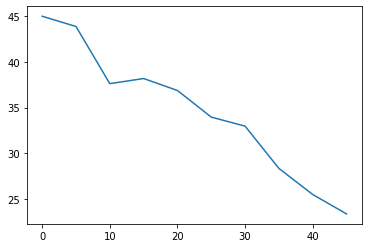

In [286]:
plt.plot(mouse_s185_df['Timepoint'], mouse_s185_df['Tumor Volume (mm3)'])
plt.show()

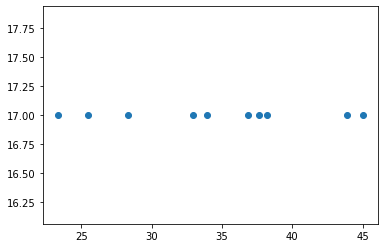

In [287]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
plt.scatter(mouse_s185_df['Tumor Volume (mm3)'], mouse_s185_df['Weight (g)'])
plt.show()

## Correlation and Regression

In [288]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
mouse_weight_tumor_vol = capomulin_mouse_df.groupby('Mouse ID').mean().reset_index()
mouse_weight_tumor_vol.head()

,Mouse ID,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,9.0,22.0,22.5,41.963636,0.7
1,b742,7.0,21.0,22.5,40.083699,0.0
2,f966,16.0,17.0,10.0,36.505973,0.0
3,g288,3.0,19.0,22.5,41.990097,0.8
4,g316,22.0,22.0,22.5,44.613344,1.0


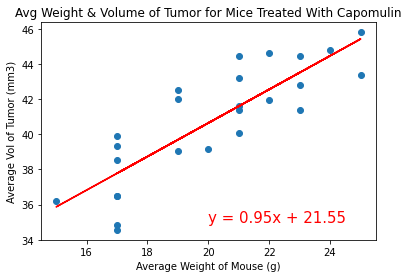

In [294]:
# Crafting linear regression 
x_values = mouse_weight_tumor_vol["Weight (g)"]
y_values = mouse_weight_tumor_vol["Tumor Volume (mm3)"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.title("Avg Weight & Volume of Tumor for Mice Treated With Capomulin")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,35),fontsize=15,color="red")
plt.xlabel('Average Weight of Mouse (g)')
plt.ylabel('Average Vol of Tumor (mm3)')
plt.show()

In [292]:
print(rvalue**2)

0.7088568047708717
